In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='utf-8', encoding_errors='replace')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
330,ham,K.k:)apo k.good movie.,NaN,NaN,NaN
575,spam,"You have won ?1,000 cash or a ?2,000 prize! To...",NaN,NaN,NaN
5087,ham,"Good morning, im suffering from fever and dyse...",NaN,NaN,NaN
4936,ham,G wants to know where the fuck you are,NaN,NaN,NaN
1538,ham,Midnight at the earliest,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 colus
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
2984,ham,No break time one... How... I come out n get m...
3523,ham,Yeah that'd pretty much be the best case scenario
4125,spam,"SPJanuary Male Sale! Hot Gay chat now cheaper,..."
3560,spam,Text BANNEDUK to 89555 to see! cost 150p texto...
492,ham,"Sorry,in meeting I'll call later"


In [8]:
# Renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.sample(5)

,target,text
3927,ham,Babe ? I lost you ... Will you try rebooting ?
5062,ham,Ok i also wan 2 watch e 9 pm show...
1482,ham,Ok...
873,ham,Ugh its been a long day. I'm exhausted. Just w...
1095,ham,Ryder unsold.now gibbs.


In [10]:
# labelencoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# Check for duplicate values
df.duplicated().sum()

np.int64(403)

In [15]:
# remove dupllicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

# 2. EDA

In [16]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

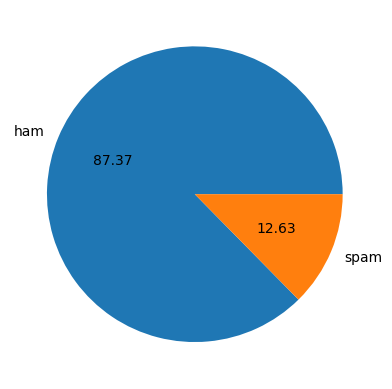

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [18]:
# Data is imbalaced

In [19]:
df['num_characters'] = df['text'].apply(len)

In [20]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
import re

def count_tokens(text):
    if not isinstance(text, str):
        return 0
    # Match words or continuous non-word sequences (like '...', '!!!', etc.)
    tokens = re.findall(r'\w+|[^\w\s]+', text)
    return len(tokens)

df['word_count'] = df['text'].apply(count_tokens)


In [22]:
df.head()

,target,text,num_characters,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16


In [23]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [24]:
df['text'][1]

'Ok lar... Joking wif u oni...'

In [25]:
import re

def count_sentences(text):
    if not isinstance(text, str):
        return 0
    # Replace "..." with a special token to treat it as one end marker
    text = text.replace('...', '<ELLIPSIS>')
    # Split on '.', '?', '!', or the <ELLIPSIS> token
    parts = re.split(r'[.!?]+|<ELLIPSIS>', text)
    # Filter out empty strings/spaces
    sentences = [s.strip() for s in parts if s.strip()]
    return len(sentences)

df['sentence_count'] = df['text'].apply(count_sentences)


In [26]:
df.head()

,target,text,num_characters,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2
3,0,U dun say so early hor... U c already then say...,49,13,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1


In [27]:
df.rename(columns={'word_count':'num_words','sentence_count':'num_sentences'},inplace=True)

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2
3,0,U dun say so early hor... U c already then say...,49,13,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,19.174502,2.304508
std,58.174846,13.913589,1.639932
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,2.000000
75%,117.000000,28.000000,3.000000
max,910.000000,210.000000,31.000000


In [30]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.472099,2.099424
std,56.356802,13.774207,1.510418
min,2.000000,1.000000,1.000000
25%,34.000000,9.000000,1.000000
50%,52.000000,13.000000,2.000000
75%,90.000000,22.000000,3.000000
max,910.000000,210.000000,31.000000


In [31]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,30.947933,3.722818
std,30.014336,7.855504,1.792465
min,13.000000,2.000000,1.000000
25%,131.000000,28.000000,2.000000
50%,148.000000,32.000000,4.000000
75%,157.000000,36.000000,5.000000
max,223.000000,49.000000,10.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

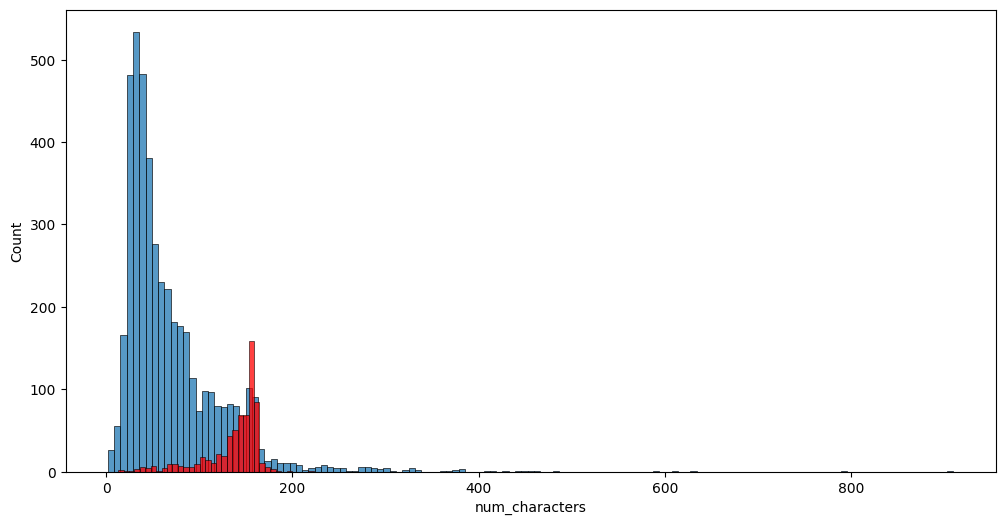

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

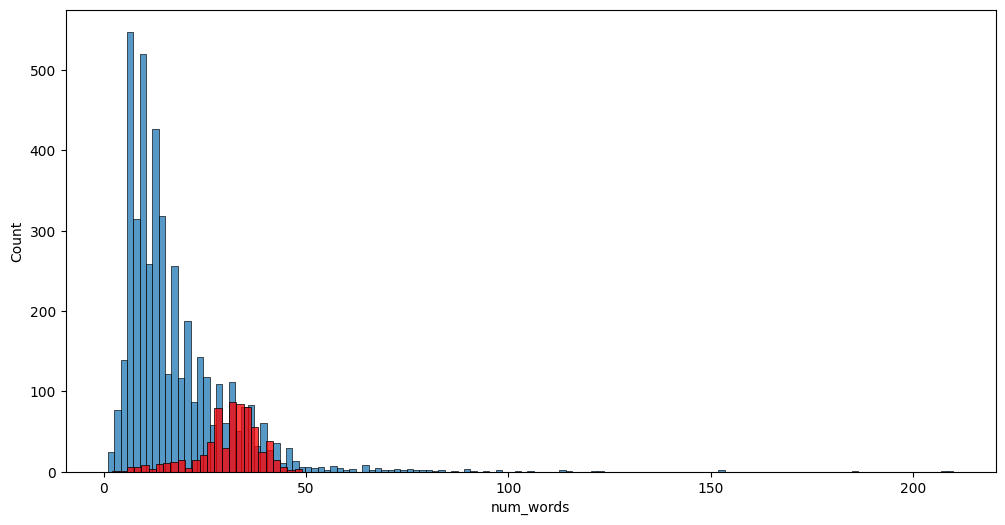

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

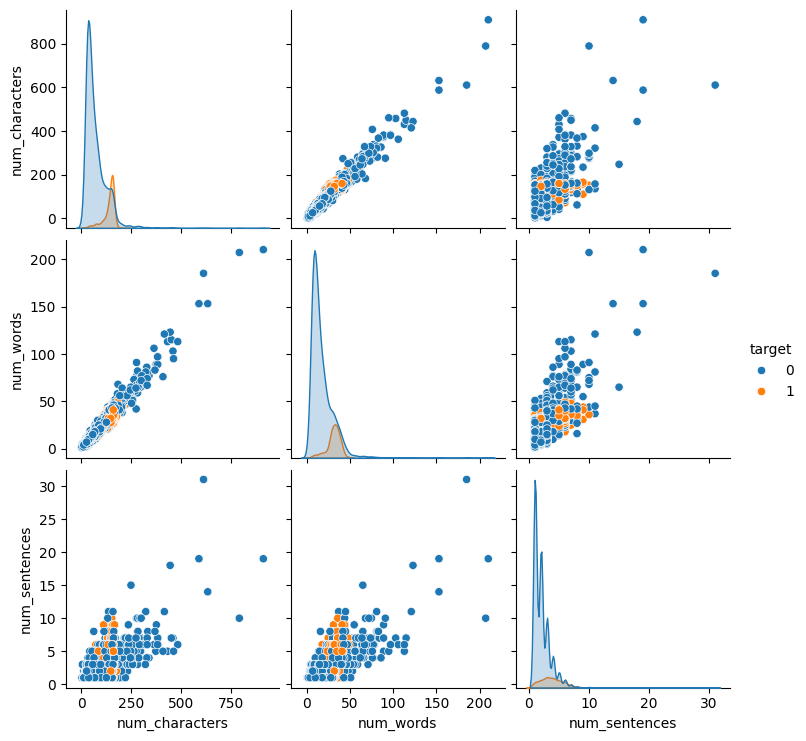

In [35]:
sns.pairplot(df,hue='target')

<Axes: >

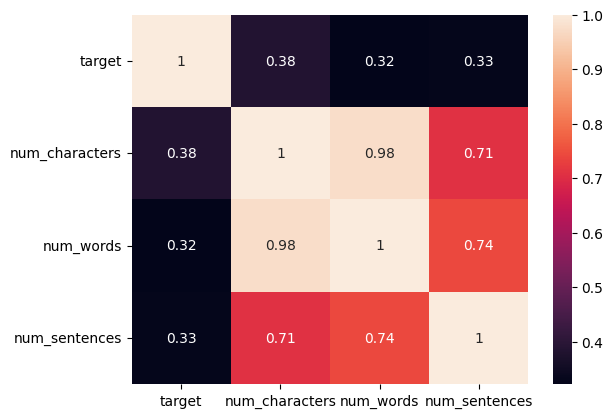

In [36]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

# 3. Data Preprocessing
<li>Lower case</li>
<li>Tokenization</li>
<li>Removing special characters</li>
<li>Removing stop words and punctuation</li>
<li>Steaming</li>

In [37]:
import re

def custom_word_tokenize(text):
    if not isinstance(text, str):
        return []

    # Preserve ellipsis as one token
    text = text.replace('...', ' <ELLIPSIS> ')

    # Tokenize using regex: keep words, contractions, punctuation
    tokens = re.findall(r"\w+(?:'\w+)?|[^\w\s]", text)

    # Replace <ELLIPSIS> placeholder back
    tokens = ['...' if token == '<ELLIPSIS>' else token for token in tokens]

    return tokens


In [49]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string
string.punctuation



def transform_text(text):
    text = text.lower()
    text = custom_word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text :
        y.append(ps.stem(i))
    return " ".join(y)

In [50]:
transform_text('I loved the YT lect on Machine Learning. How about you?')

'love yt lect machin learn'

In [51]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [46]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [47]:
df['text'].apply(transform_text)
df['transformed_text'] = df['text'].apply(transform_text)

In [52]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ellipsi joke wif u oni ellipsi
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun say earli hor ellipsi u c alreadi say el...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1,nah think goe usf live around though


In [53]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [54]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=""))

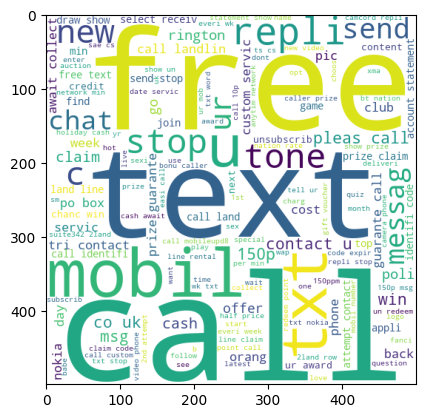

In [55]:
plt.imshow(spam_wc)

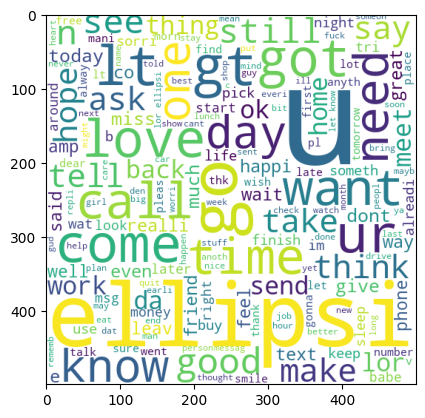

In [56]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=""))
plt.imshow(ham_wc)

In [57]:
spam_corpus =[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [58]:
len(spam_corpus)

11700

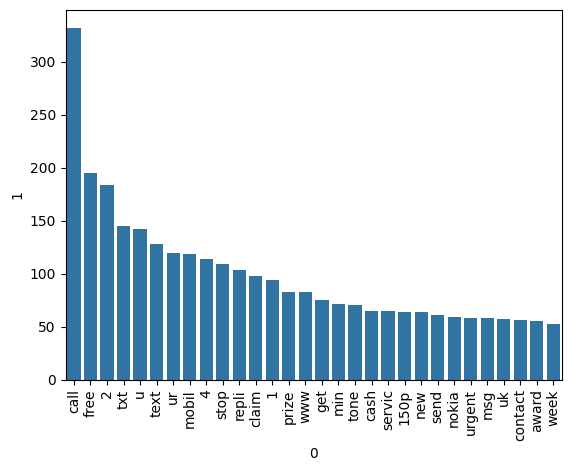

In [59]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [60]:
ham_corpus =[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [61]:
len(ham_corpus)

37210

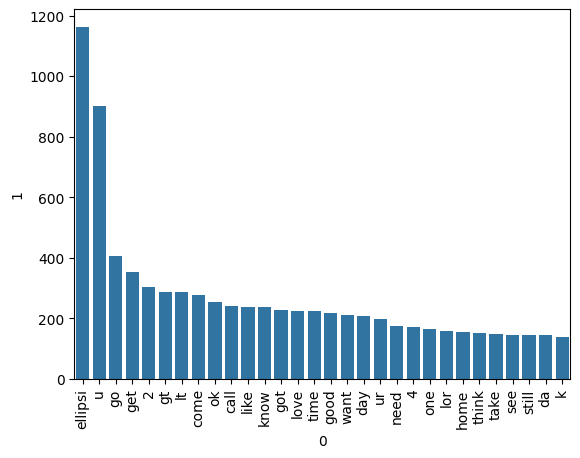

In [62]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [183]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [184]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [185]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X =scaler.fit_transform(X)

In [186]:
X.shape

(5169, 3000)

In [187]:
y = df['target'].values

In [188]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [191]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [192]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [193]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.879110251450677
[[791 105]
 [ 20 118]]
0.5291479820627802


In [194]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9748549323017408
[[896   0]
 [ 26 112]]
1.0


In [157]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9893617021276596
[[896   0]
 [ 11 127]]
1.0


In [158]:
# Since data is imbalance so here precision matter as spam is not classified as not spam
# so we have to select mnb and tfidf 

In [159]:
# let compare with other algo
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [160]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [161]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [162]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [163]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, np.float64(0.9747899159663865))

In [164]:
accuracy_scores = []
precision_scores =[]

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9748549323017408
Precision -  1.0
For  DT
Accuracy -  0.9381044487427466
Precision -  0.8363636363636363
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9357798165137615
For  RF
Accuracy -  0.9787234042553191
Precision -  0.9915254237288136


C:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9700193423597679
Precision -  0.9652173913043478
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8357142857142857
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9672131147540983
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9484536082474226
For  xgb
Accuracy -  0.9806576402321083
Precision -  0.9836065573770492


In [165]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.974855,1.000000
5,RF,0.978723,0.991525
10,xgb,0.980658,0.983607
0,SVC,0.975822,0.974790
8,ETC,0.976789,0.967213
6,AdaBoost,0.970019,0.965217
9,GBDT,0.950677,0.948454
4,LR,0.958414,0.935780
3,DT,0.938104,0.836364


In [166]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [167]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.974855
2,RF,Accuracy,0.978723
3,xgb,Accuracy,0.980658
4,SVC,Accuracy,0.975822
5,ETC,Accuracy,0.976789
6,AdaBoost,Accuracy,0.970019
7,GBDT,Accuracy,0.950677
8,LR,Accuracy,0.958414
9,DT,Accuracy,0.938104


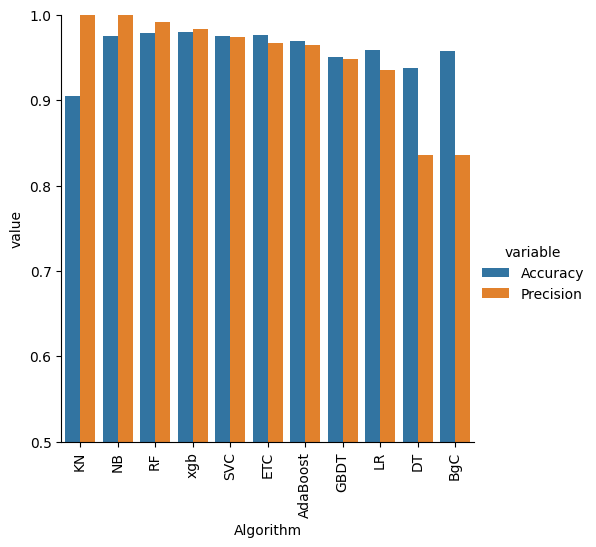

In [168]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [169]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [170]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [171]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [172]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [173]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [174]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.974855,1.000000,0.974855,1.000000,0.974855,1.000000,0.974855,1.000000
2,RF,0.978723,0.991525,0.978723,0.991525,0.978723,0.991525,0.978723,0.991525
3,xgb,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607
4,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
5,ETC,0.976789,0.967213,0.976789,0.967213,0.976789,0.967213,0.976789,0.967213
6,AdaBoost,0.970019,0.965217,0.970019,0.965217,0.970019,0.965217,0.970019,0.965217
7,GBDT,0.950677,0.948454,0.950677,0.948454,0.950677,0.948454,0.950677,0.948454
8,LR,0.958414,0.935780,0.958414,0.935780,0.958414,0.935780,0.958414,0.935780
9,DT,0.938104,0.836364,0.938104,0.836364,0.938104,0.836364,0.938104,0.836364


In [175]:
# Voting Classifier
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [176]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [177]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [178]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9918032786885246


In [179]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [180]:
from sklearn.ensemble import StackingClassifier

In [181]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [182]:

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9615384615384616


In [195]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))